In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics as stats
import csv
import re 

In [3]:
forbes1 = pd.read_csv("forbes1.csv", header = None)
forbes2 = pd.read_csv("forbes2.csv", header = None) 

In [4]:
forbes2.drop_duplicates

<bound method DataFrame.drop_duplicates of                                   0        1                             2  \
0                           #1 ICBC    $311B                   Major Banks   
1        #2 China Construction Bank  $261.2B                   Major Banks   
2                 #3 JPMorgan Chase  $387.7B                   Major Banks   
3             #4 Berkshire Hathaway  $491.9B           Investment Services   
4     #5 Agricultural Bank of China  $184.1B                Regional Banks   
5                #6 Bank of America  $313.5B                   Major Banks   
6                    #7 Wells Fargo  $265.3B                   Major Banks   
7                          #8 Apple  $926.9B             Computer Hardware   
8                  #9 Bank of China  $158.6B                   Major Banks   
9       #10 Ping An Insurance Group  $181.4B         Diversified Insurance   
10            #11 Royal Dutch Shell  $306.5B          Oil & Gas Operations   
11                 #1

In [5]:
forbes2.columns = ['CompRank', 'Market Capitalization', 'Industry', 'Founded', 'Country', 'Chairman', 'Employees']

In [6]:
forbes1.columns = ['Company', 'Country', 'Sales', 'Profits', 'Assets', 'Market Value']

In [7]:
forbes2[["Rank", "Name"]] = forbes2['CompRank'].str.split(n = 1, expand = True)

In [8]:
forbes2 = forbes2.drop(['CompRank'], axis = 1)

In [9]:
forbes2.columns = ['Market Value', 'Industry', 'Founded', 'Country', 'Chairman', 'Employees', 'Rank', 'Company']

In [10]:
forbes = forbes2.merge(forbes1, on = 'Company')

In [11]:
forbes = forbes.drop("Market Value_x", axis = 1)

In [12]:
forbes = forbes.drop("Country_x", axis = 1)

In [13]:
cols = forbes.columns.tolist()
cols = ['Rank', 'Company', 'Country_y', 'Industry', 'Assets', 'Sales', 'Profits', 'Market Value_y', 'Employees', 'Founded', 'Chairman']

In [14]:
forbes = forbes[cols]

In [15]:
forbes = forbes.rename(columns = {'Country_y': 'Country', 'Market Value_y': 'Market Capitalization'})

In [16]:
def convert_str_to_float(s):
    try:
        num, order = s.strip().split()
        num = float(num)
        if order == 'B':
            return num * 1000000000
        elif order == 'M':
            return num * 1000000
        else:
            pass
    except:
        pass

In [17]:
forbes['Assets'] = forbes['Assets'].str.replace(",", "")
forbes['Assets'] = forbes['Assets'].str.replace("$", "")
forbes['Assets'] = forbes['Assets'].apply(convert_str_to_float)

In [18]:
forbes['Sales'] = forbes['Sales'].str.replace(",", "")
forbes['Sales'] = forbes['Sales'].str.replace("$", "")
forbes['Sales'] = forbes['Sales'].apply(convert_str_to_float)

In [19]:
forbes['Profits'] = forbes['Profits'].str.replace(",", "")
forbes['Profits'] = forbes['Profits'].str.replace("$", "")
forbes['Profits'] = forbes['Profits'].apply(convert_str_to_float)

In [20]:
forbes['Market Capitalization'] = forbes['Market Capitalization'].str.replace(",", "")
forbes['Market Capitalization'] = forbes['Market Capitalization'].str.replace("$", "")
forbes['Market Capitalization'] = forbes['Market Capitalization'].apply(convert_str_to_float)

In [21]:
forbes.head()

,Rank,Company,Country,Industry,Assets,Sales,Profits,Market Capitalization,Employees,Founded,Chairman
0,#1,ICBC,China,Major Banks,4.210900e+12,1.653000e+11,4.370000e+10,3.110000e+11,"453,048",1984,Shu Gu
1,#2,China Construction Bank,China,Major Banks,3.631600e+12,1.432000e+11,3.720000e+10,2.612000e+11,"352,621",1954,Wang Zuji
2,#3,JPMorgan Chase,United States,Major Banks,2.609800e+12,1.182000e+11,2.650000e+10,3.877000e+11,"252,539",1968,Jamie Dimon
3,#4,Berkshire Hathaway,United States,Investment Services,7.027000e+11,2.352000e+11,3.970000e+10,4.919000e+11,"377,000",1955,Warren Buffett
4,#5,Agricultural Bank of China,China,Regional Banks,3.439300e+12,1.293000e+11,2.960000e+10,1.841000e+11,"487,307",1951,Huan Zhao


In [22]:
#American Companies

In [23]:
forbes_US = forbes.loc[forbes['Country'] == 'United States']

In [24]:
forbes.head(15)

,Rank,Company,Country,Industry,Assets,Sales,Profits,Market Capitalization,Employees,Founded,Chairman
0,#1,ICBC,China,Major Banks,4.210900e+12,1.653000e+11,4.370000e+10,3.110000e+11,"453,048",1984,Shu Gu
1,#2,China Construction Bank,China,Major Banks,3.631600e+12,1.432000e+11,3.720000e+10,2.612000e+11,"352,621",1954,Wang Zuji
2,#3,JPMorgan Chase,United States,Major Banks,2.609800e+12,1.182000e+11,2.650000e+10,3.877000e+11,"252,539",1968,Jamie Dimon
3,#4,Berkshire Hathaway,United States,Investment Services,7.027000e+11,2.352000e+11,3.970000e+10,4.919000e+11,"377,000",1955,Warren Buffett
4,#5,Agricultural Bank of China,China,Regional Banks,3.439300e+12,1.293000e+11,2.960000e+10,1.841000e+11,"487,307",1951,Huan Zhao
5,#6,Bank of America,United States,Major Banks,2.328500e+12,1.030000e+11,2.030000e+10,3.135000e+11,"209,000",1904,Brian Moynihan
6,#7,Wells Fargo,United States,Major Banks,1.915400e+12,1.021000e+11,2.170000e+10,2.653000e+11,"262,700",1852,Timothy Sloan
7,#8,Apple,United States,Computer Hardware,3.675000e+11,2.475000e+11,5.330000e+10,9.269000e+11,"123,000",1976,Tim Cook
8,#9,Bank of China,China,Major Banks,3.204200e+12,1.182000e+11,2.640000e+10,1.586000e+11,"311,133",1912,Chen Siqing
9,#10,Ping An Insurance Group,China,Diversified Insurance,1.066400e+12,1.416000e+11,1.390000e+10,1.814000e+11,"342,550",1988,Ming Ma


In [25]:
forbes_US.sort_values('Assets', ascending = True)

,Rank,Company,Country,Industry,Assets,Sales,Profits,Market Capitalization,Employees,Founded,Chairman
1951,#1959,Abiomed,United States,Medical Equipment & Supplies,7.860000e+08,5.940000e+08,1.120000e+08,1.650000e+10,$594M,1981,Michael Minogue
1955,#1963,Chaparral Energy,United States,Oil & Gas Operations,1.200000e+09,2.940000e+08,9.230000e+08,9.880000e+08,216,1988,K. Reynolds
1873,#1878,IDEXX Laboratories,United States,Medical Equipment & Supplies,1.500000e+09,2.000000e+09,2.840000e+08,1.840000e+10,$2B,United States,"7,600"
1761,#1764,Core-Mark Holding,United States,Trading Companies,1.700000e+09,1.600000e+10,3.000000e+07,8.800000e+08,$16B,United States,"8,413"
1763,#1767,Align Technology,United States,Medical Equipment & Supplies,1.800000e+09,1.600000e+09,2.580000e+08,2.300000e+10,"8,715",1997,Joseph Hogan
1991,#1996,SEI Investments,United States,Investment Services,1.900000e+09,1.600000e+09,4.560000e+08,1.020000e+10,$1.6B,United States,"3,650"
1936,#1941,Splunk,United States,Computer Services,2.000000e+09,1.300000e+09,-2.590000e+08,1.680000e+10,"3,200",2003,Doug Merritt
1944,#1952,Match Group,United States,Software & Programming,2.200000e+09,1.400000e+09,4.310000e+08,1.120000e+10,"1,400",2009,Mandy Ginsberg
1876,#1881,Murphy USA,United States,Specialty Stores,2.300000e+09,1.310000e+10,2.880000e+08,2.200000e+09,"9,600",2013,R. Clyde
1780,#1784,Square,United States,Software & Programming,2.400000e+09,2.400000e+09,-7.200000e+07,2.200000e+10,$2.4B,2009,"2,338"


In [26]:
# USA founded year
forbes_USFounded = forbes_US.groupby('Founded', as_index = False).count()

In [27]:
cols = forbes_USFounded.columns.tolist()
cols

['Founded',
 'Rank',
 'Company',
 'Country',
 'Industry',
 'Assets',
 'Sales',
 'Profits',
 'Market Capitalization',
 'Employees',
 'Chairman']

In [28]:
cols = ['Founded', 'Rank']

In [29]:
cols = forbes_USFounded.columns.tolist()
cols

['Founded',
 'Rank',
 'Company',
 'Country',
 'Industry',
 'Assets',
 'Sales',
 'Profits',
 'Market Capitalization',
 'Employees',
 'Chairman']

In [30]:
cols = ['Founded', 'Rank']

In [31]:
forbes_USFounded = forbes_USFounded[cols]

In [32]:
forbes_USFounded = forbes_USFounded.rename(columns = {'Rank': 'Count'})

In [33]:
forbes_USFounded = forbes_USFounded.sort_values(by = ['Count'], ascending = False)

In [34]:
forbes_USFounded = forbes_USFounded[forbes_USFounded.Founded != 'United States']

In [35]:
forbes_USFounded = forbes_USFounded.reset_index()

In [36]:
forbes_USFounded = forbes_USFounded.drop('index', axis = 1)

In [37]:
forbes_USFounded.index = forbes_USFounded.index + 1

In [38]:
USFounded = forbes_USFounded.head(11)

In [39]:
#USA by industry

In [40]:
forbes_USIndustry = forbes_US.groupby('Industry', as_index = False).count()

In [41]:
forbes_USIndustry

,Industry,Rank,Company,Country,Assets,Sales,Profits,Market Capitalization,Employees,Founded,Chairman
0,1973,1,1,1,1,1,1,1,1,1,1
1,2006,1,1,1,1,1,1,1,1,1,1
2,2012,2,2,2,2,2,2,2,2,2,2
3,2018,1,1,1,1,1,1,1,1,1,1
4,Advertising,2,2,2,2,2,2,2,2,2,2
5,Aerospace & Defense,12,12,12,12,12,12,12,12,12,12
6,Air Courier,3,3,3,3,3,3,3,3,3,3
7,Airline,6,6,6,6,6,6,6,6,6,6
8,Aluminum,2,2,2,2,2,2,2,2,2,2
9,Apparel/Accessories,3,3,3,3,3,3,3,3,3,3


In [42]:
cols = forbes_USIndustry.columns.tolist()
cols

['Industry',
 'Rank',
 'Company',
 'Country',
 'Assets',
 'Sales',
 'Profits',
 'Market Capitalization',
 'Employees',
 'Founded',
 'Chairman']

In [43]:
cols = ['Industry', 'Rank']

In [44]:
forbes_USIndustry = forbes_USIndustry[cols]

In [45]:
forbes_USIndustry = forbes_USIndustry.rename(columns = {'Rank': 'Count'})

In [46]:
forbes_USIndustry = forbes_USIndustry.sort_values(by = ['Count'], ascending = False)

In [47]:
forbes_USIndustry = forbes_USIndustry.reset_index()

In [48]:
forbes_USIndustry = forbes_USIndustry.iloc[:20]

In [49]:
forbes_USIndustry = forbes_USIndustry.drop('index', axis = 1)

In [50]:
forbes_USIndustry.index = forbes_USIndustry.index + 1

In [51]:
forbes_USIndustry

,Industry,Count
1,Oil & Gas Operations,28
2,Investment Services,26
3,Electric Utilities,25
4,Real Estate,25
5,Regional Banks,21
6,Business & Personal Services,19
7,Semiconductors,18
8,Software & Programming,17
9,Food Processing,14
10,Medical Equipment & Supplies,13


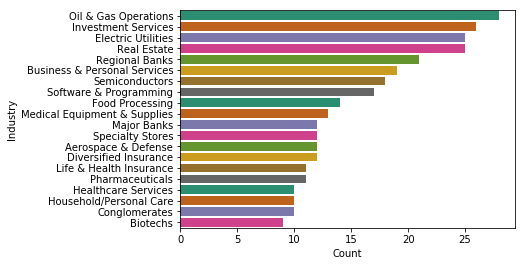

In [52]:
USIndustry_bar = sns.barplot(x = 'Count', y = 'Industry', data = forbes_USIndustry, orient = 'h', palette = 'Dark2')

In [53]:
# barplot countries data

In [54]:
forbes_CountryCount = forbes.groupby('Country', as_index = False).count()

In [55]:
cols = forbes_CountryCount.columns.tolist()
cols

['Country',
 'Rank',
 'Company',
 'Industry',
 'Assets',
 'Sales',
 'Profits',
 'Market Capitalization',
 'Employees',
 'Founded',
 'Chairman']

In [56]:
cols = ['Country', 'Rank']

In [57]:
forbes_CountryCount = forbes_CountryCount[cols]

In [58]:
forbes_CountryCount = forbes_CountryCount.rename(columns = {'Rank': 'Count'})

In [59]:
forbes_CountryCount = forbes_CountryCount.sort_values(by = ['Count'], ascending = False)

In [60]:
forbes_CountryCount = forbes_CountryCount.reset_index()

In [61]:
forbes_CountryCount = forbes_CountryCount.drop('index', axis = 1)

In [62]:
forbes_CountryCount = forbes_CountryCount.iloc[:20]

In [63]:
forbes_CountryCount.index = forbes_CountryCount.index + 1

In [64]:
forbes_CountryCount

,Country,Count
1,United States,554
2,Japan,231
3,China,231
4,United Kingdom,86
5,South Korea,68
6,Hong Kong,60
7,France,59
8,India,57
9,Germany,55
10,Canada,51


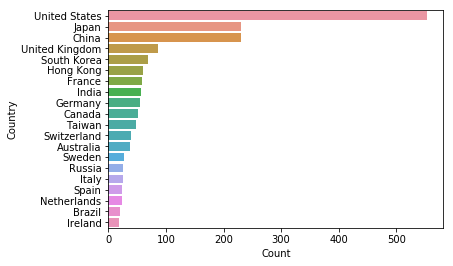

In [65]:
country_bar = sns.barplot(x = 'Count', y = 'Country', data = forbes_CountryCount, orient = 'h')

In [66]:
# barplot year founded

In [67]:
forbes_FoundedCount = forbes.groupby('Founded', as_index = False).count()

In [68]:
cols = forbes_FoundedCount.columns.tolist()
cols

['Founded',
 'Rank',
 'Company',
 'Country',
 'Industry',
 'Assets',
 'Sales',
 'Profits',
 'Market Capitalization',
 'Employees',
 'Chairman']

In [69]:
cols = ['Founded', 'Rank']

In [70]:
forbes_FoundedCount = forbes_FoundedCount[cols]

In [71]:
forbes_FoundedCount = forbes_FoundedCount.rename(columns = {'Rank': 'Count'})

In [72]:
forbes_FoundedCount = forbes_FoundedCount.sort_values(by = ['Count'], ascending = False)

In [73]:
forbes_FoundedCount = forbes_FoundedCount[forbes_FoundedCount.Founded != 'China']

In [74]:
forbes_FoundedCount = forbes_FoundedCount.reset_index()

In [75]:
forbes_FoundedCount = forbes_FoundedCount.drop('index', axis = 1)

In [76]:
forbes_FoundedCount.index = forbes_FoundedCount.index + 1

In [77]:
forbes_FoundedCount = forbes_FoundedCount.iloc[:8]

In [78]:
forbes_FoundedCount

,Founded,Count
1,1997,43
2,1996,36
3,1995,33
4,1999,33
5,1994,30
6,2005,29
7,2000,27
8,1985,27


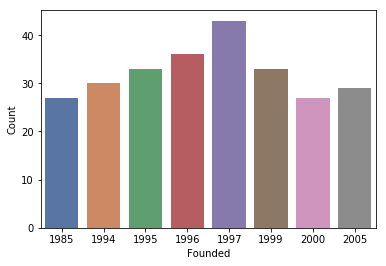

In [79]:
founded_bar = sns.barplot(x = 'Founded', y = 'Count', data = forbes_FoundedCount, palette = 'deep')

In [80]:
# barplot Industries

In [81]:
forbes_IndustryCount = forbes.groupby('Industry', as_index = False).count()

In [82]:
cols = forbes_IndustryCount.columns.tolist()
cols

['Industry',
 'Rank',
 'Company',
 'Country',
 'Assets',
 'Sales',
 'Profits',
 'Market Capitalization',
 'Employees',
 'Founded',
 'Chairman']

In [83]:
cols = ['Industry', 'Rank']

In [84]:
forbes_IndustryCount = forbes_IndustryCount[cols]

In [85]:
forbes_IndustryCount = forbes_IndustryCount.rename(columns = {'Rank': 'Count'})

In [86]:
forbes_IndustryCount = forbes_IndustryCount.sort_values(by = ['Count'], ascending = False)

In [87]:
forbes_IndustryCount = forbes_IndustryCount.iloc[:15]

In [88]:
forbes_IndustryCount = forbes_IndustryCount.reset_index()

In [89]:
forbes_IndustryCount = forbes_IndustryCount.drop('index', axis = 1)

In [90]:
forbes_IndustryCount.index = forbes_IndustryCount.index + 1 

In [91]:
forbes_IndustryCount

,Industry,Count
1,Regional Banks,244
2,Investment Services,89
3,Oil & Gas Operations,83
4,Real Estate,83
5,Electric Utilities,79
6,Major Banks,63
7,Telecommunications services,55
8,Construction Services,54
9,Diversified Insurance,50
10,Food Processing,44


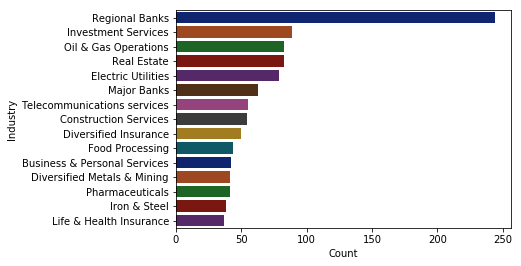

In [92]:
industry_bar = sns.barplot(x = 'Count', y='Industry', data = forbes_IndustryCount, palette = 'dark', orient = 'h')

In [93]:
# Presentation

In [94]:
forbes_CountryCount

,Country,Count
1,United States,554
2,Japan,231
3,China,231
4,United Kingdom,86
5,South Korea,68
6,Hong Kong,60
7,France,59
8,India,57
9,Germany,55
10,Canada,51


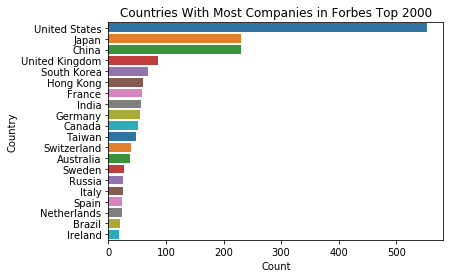

In [95]:
country_bar = sns.barplot(x = 'Count', y = 'Country', data = forbes_CountryCount, orient = 'h', palette = 'tab10').set_title("Countries With Most Companies in Forbes Top 2000")

In [96]:
forbes_IndustryCount

,Industry,Count
1,Regional Banks,244
2,Investment Services,89
3,Oil & Gas Operations,83
4,Real Estate,83
5,Electric Utilities,79
6,Major Banks,63
7,Telecommunications services,55
8,Construction Services,54
9,Diversified Insurance,50
10,Food Processing,44


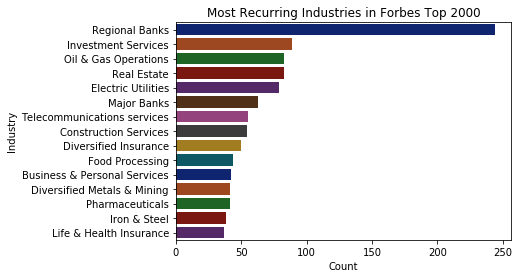

In [97]:
industry_bar = sns.barplot(x='Count', y='Industry', data = forbes_IndustryCount, palette = 'dark', orient = 'h').set_title("Most Recurring Industries in Forbes Top 2000")

In [98]:
forbes_USIndustry

,Industry,Count
1,Oil & Gas Operations,28
2,Investment Services,26
3,Electric Utilities,25
4,Real Estate,25
5,Regional Banks,21
6,Business & Personal Services,19
7,Semiconductors,18
8,Software & Programming,17
9,Food Processing,14
10,Medical Equipment & Supplies,13


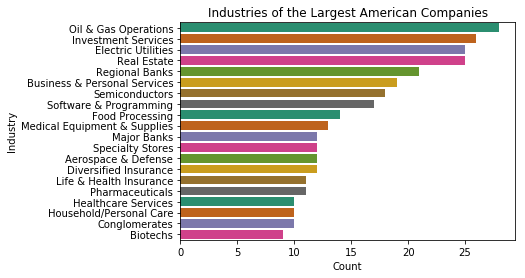

In [99]:
USIndustry_bar = sns.barplot(x = 'Count', y = 'Industry', data = forbes_USIndustry, orient = 'h', palette = 'Dark2').set_title("Industries of the Largest American Companies")

In [100]:
forbes_FoundedCount

,Founded,Count
1,1997,43
2,1996,36
3,1995,33
4,1999,33
5,1994,30
6,2005,29
7,2000,27
8,1985,27


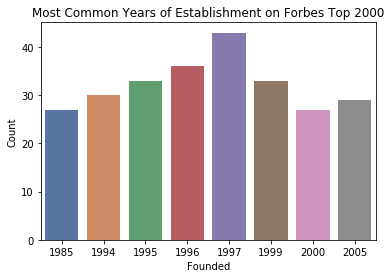

In [101]:
founded_bar = sns.barplot(x = 'Founded', y = 'Count', data = forbes_FoundedCount, palette = 'deep').set_title("Most Common Years of Establishment on Forbes Top 2000")

In [102]:
forbes_USFounded.head(11)

,Founded,Count
1,2004,11
2,1968,11
3,1971,11
4,1986,11
5,1995,11
6,1985,11
7,1998,10
8,1997,10
9,2005,9
10,1984,9


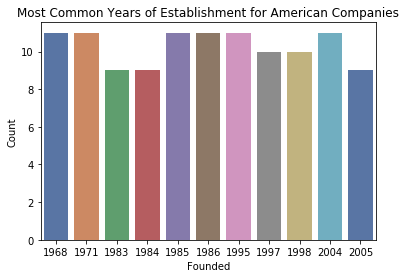

In [103]:
USfounded_bar = sns.barplot(x = 'Founded', y = 'Count', data = USFounded, palette = 'deep').set_title("Most Common Years of Establishment for American Companies")

In [104]:
forbesAssets = forbes.sort_values("Assets", ascending = False)

In [105]:
forbes1 = forbesAssets.iloc[:100]

In [106]:
forbes2 = forbesAssets.iloc[900:1100]

In [107]:
# Assets vs Sales

Text(0.5, 1.0, 'Top 100')

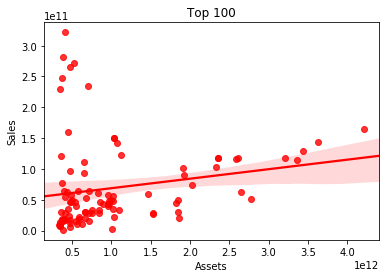

In [108]:
#top 100
sns.regplot(x = "Assets", y = "Sales", data = forbes1, color = 'red').set_title("Top 100")

Text(0.5, 1.0, 'Middle')

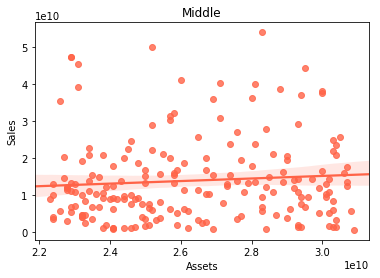

In [109]:
#middle
sns.regplot(x = "Assets", y = "Sales", data = forbes2, color = "tomato").set_title("Middle")

Text(0.5, 1.0, 'Forbes Top 2000')

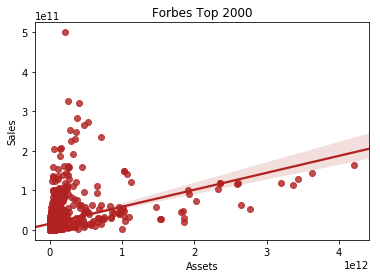

In [110]:
#all
sns.regplot(x = "Assets", y = "Sales", data = forbes, color = 'firebrick').set_title("Forbes Top 2000")

In [111]:
# Assets vs Market Cap

Text(0.5, 1.0, 'Top 100')

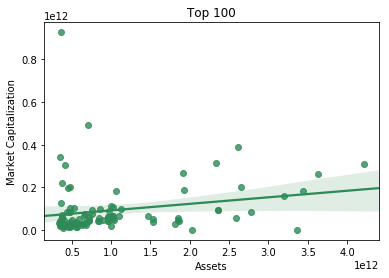

In [112]:
sns.regplot(x = "Assets", y = "Market Capitalization", data = forbes1, color = 'seagreen').set_title("Top 100")

Text(0.5, 1.0, 'Middle')

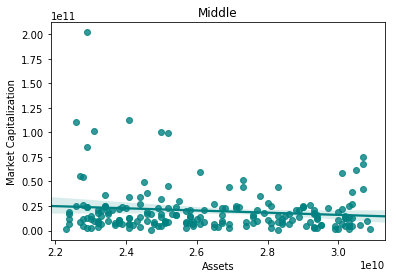

In [113]:
sns.regplot(x = "Assets", y = "Market Capitalization", data = forbes2, color = 'teal').set_title("Middle")

Text(0.5, 1.0, 'Forbes Top 2000')

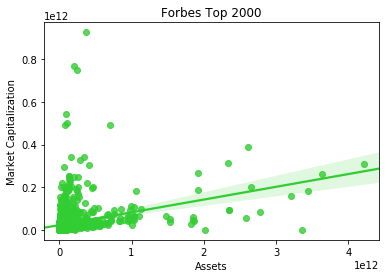

In [114]:
sns.regplot(x = "Assets", y = "Market Capitalization", data = forbes, color = 'limegreen').set_title("Forbes Top 2000")

In [115]:
# Market Cap vs Profit

Text(0.5, 1.0, 'Top 100')

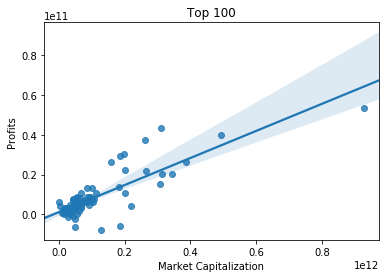

In [116]:
sns.regplot(x = "Market Capitalization", y = "Profits", data = forbes1).set_title("Top 100")

Text(0.5, 1.0, 'Middle')

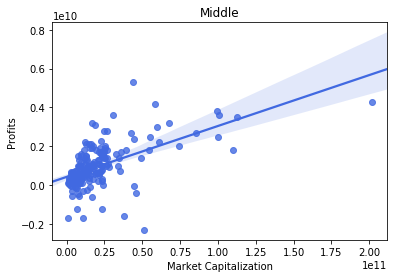

In [117]:
sns.regplot(x = "Market Capitalization", y = "Profits", data = forbes2, color = 'royalblue').set_title("Middle")

Text(0.5, 1.0, 'Forbes Top 2000')

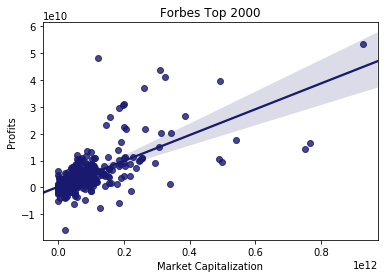

In [118]:
sns.regplot(x = "Market Capitalization", y = "Profits", data = forbes, color = 'midnightblue').set_title("Forbes Top 2000")

In [119]:
# Assets vs Profit

Text(0.5, 1.0, 'Top 100')

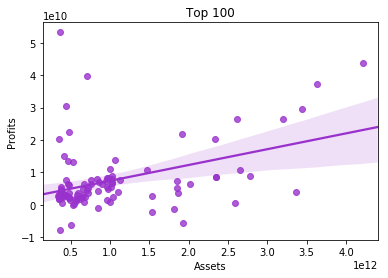

In [120]:
sns.regplot(x = "Assets", y = "Profits", data = forbes1, color = "darkorchid").set_title("Top 100")

Text(0.5, 1.0, 'Middle')

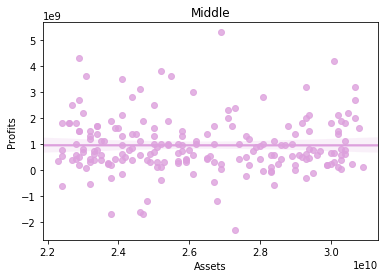

In [121]:
sns.regplot(x = "Assets", y = "Profits", data = forbes2, color = 'plum').set_title("Middle")

Text(0.5, 1.0, 'Forbes Top 2000')

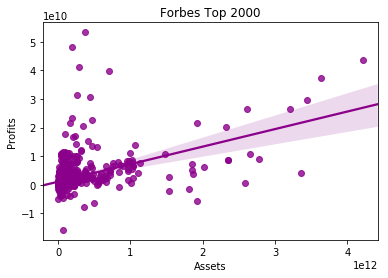

In [122]:
sns.regplot(x = "Assets", y = "Profits", data = forbes, color = 'darkmagenta').set_title("Forbes Top 2000")

In [123]:
#Market cap vs. Sales

Text(0.5, 1.0, 'Top 100')

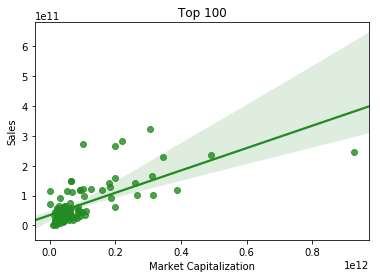

In [124]:
sns.regplot(x = "Market Capitalization", y = "Sales", data = forbes1, color = 'forestgreen').set_title("Top 100")

Text(0.5, 1.0, 'Middle')

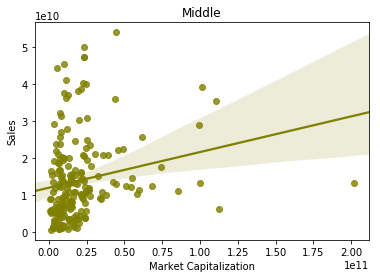

In [125]:
sns.regplot(x = "Market Capitalization", y = "Sales", data = forbes2, color = 'olive').set_title("Middle")

Text(0.5, 1.0, 'Forbes Top 2000')

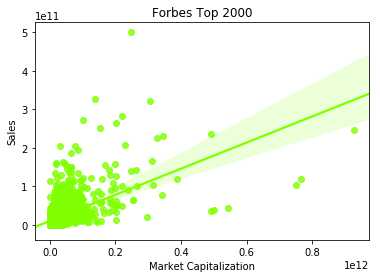

In [126]:
sns.regplot(x = "Market Capitalization", y = "Sales", data = forbes, color = 'chartreuse').set_title("Forbes Top 2000")

In [127]:
forbes.corr()

,Assets,Sales,Profits,Market Capitalization
Assets,1.000000,0.379533,0.492189,0.322225
Sales,0.379533,1.000000,0.575730,0.557648
Profits,0.492189,0.575730,1.000000,0.716771
Market Capitalization,0.322225,0.557648,0.716771,1.000000


In [128]:
forbes1.corr()

,Assets,Sales,Profits,Market Capitalization
Assets,1.000000,0.193235,0.410556,0.211764
Sales,0.193235,1.000000,0.611855,0.679986
Profits,0.410556,0.611855,1.000000,0.828456
Market Capitalization,0.211764,0.679986,0.828456,1.000000


In [131]:
forbes2.corr()

,Assets,Sales,Profits,Market Capitalization
Assets,1.000000,0.080457,-0.000716,-0.122432
Sales,0.080457,1.000000,0.189664,0.202955
Profits,-0.000716,0.189664,1.000000,0.579780
Market Capitalization,-0.122432,0.202955,0.579780,1.000000
